In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import scripts.visualization as viz
viz.load_matplotlib()

In [2]:
%%time

n = 10000
m = 3

ntimes = 50

p1 = 0.1
p2 = 0.3
p3 = 0.8

g1 = [nx.barabasi_albert_graph(n, m) for _ in range(ntimes)]
print('BA completed')
g2 = [nx.powerlaw_cluster_graph(n, m, p1) for _ in range(ntimes)]
print('BA with triad formation p=0.1')
g3 = [nx.powerlaw_cluster_graph(n, m, p2) for _ in range(ntimes)]
print('BA with triad formation p=0.3')
g4 = [nx.powerlaw_cluster_graph(n, m, p3) for _ in range(ntimes)]
print('BA with triad formation p=0.8')

BA completed
BA with triad formation p=0.1
BA with triad formation p=0.3
BA with triad formation p=0.8
Wall time: 59.2 s


In [3]:
%%time
import itertools

def get_clustering(g: nx.Graph):
    return list(dict(nx.clustering(g)).values())

def get_clustering_graphs(gs):
    return list(itertools.chain(*[get_clustering(g) for g in gs]))

c1 = get_clustering_graphs(g1)
c2 = get_clustering_graphs(g2)
c3 = get_clustering_graphs(g3)
c4 = get_clustering_graphs(g4)

Wall time: 1min 51s


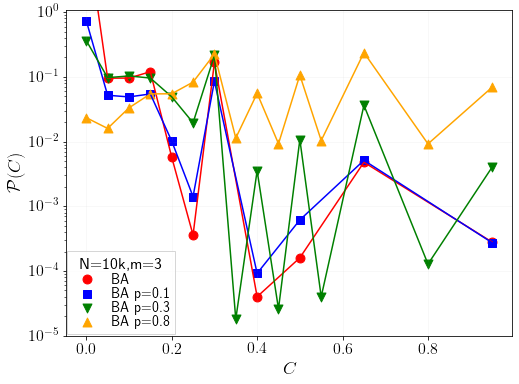

In [17]:
n_bins = 20

plt.grid(alpha=0.1)

probs, bins = np.histogram(c1, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs, label='BA', color='red', s=80)
plt.plot(bins, probs, color='red')

probs, bins = np.histogram(c2, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs / probs.sum(), label=f'BA p={p1}', color='blue', s=80, marker='s')
plt.plot(bins, probs / probs.sum(), color='blue')

probs, bins = np.histogram(c3, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs / probs.sum(), label=f'BA p={p2}', color='green', marker='v', s=80)
plt.plot(bins, probs / probs.sum(), color='green')

probs, bins = np.histogram(c4, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs / probs.sum(), label=f'BA p={p3}', color='orange', marker='^', s=80)
plt.plot(bins, probs / probs.sum(), color='orange')

plt.yscale('log')
plt.xlabel('$C$', fontsize=18)
plt.ylabel('$\mathcal{P}(C)$', fontsize=18)
plt.ylim(1e-5, 1.1)
plt.legend(loc='lower left', fontsize=14, borderaxespad=0.1, ncol=1, 
           labelspacing=0.02, fancybox=False, columnspacing=0.3, title="N=10k,m=3")
# viz.save_figure('../plots/p_c_distribution_BA_triad_formation.pdf')
# plt.show()